# Unit 5 - Financial Planning


In [2]:
!pip install python-dotenv
!pip install alpaca-trade-api

  Using cached python_dotenv-0.17.1-py2.py3-none-any.whl (18 kB)
  Using cached alpaca_trade_api-1.2.0-py3-none-any.whl (39 kB)
  Using cached websocket_client-0.59.0-py2.py3-none-any.whl (67 kB)
  Using cached websockets-8.1-cp37-cp37m-win_amd64.whl (66 kB)
  Using cached msgpack-1.0.2-cp37-cp37m-win_amd64.whl (68 kB)
  Attempting uninstall: msgpack
    Found existing installation: msgpack 1.0.0
    Uninstalling msgpack-1.0.0:
      Successfully uninstalled msgpack-1.0.0


In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [4]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [5]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [6]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
import json

In [8]:
# get btc response data with json format and print
btc_response = requests.get(btc_url).json()

print(json.dumps(btc_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18702375,
            "id": 1,
            "last_updated": 1620383917,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "CAD": {
                    "market_cap": 1286424218555.76,
                    "percent_change_1h": 0.0191513997019181,
                    "percent_change_24h": -3.09933145739289,
                    "percent_change_7d": 5.32314773771309,
                    "price": 68784.325,
                    "volume_24h": 84459843801.803
                },
                "USD": {
                    "market_cap": 1055744126841,
                    "percent_change_1h": 0.0191513997019181,
                    "percent_change_24h": -3.09933145739289,
                    "percent_change_7d": 5.32314773771309,
                    "percentage_change_1h": 0.0191513997019181,
                    "percentage_change_24h": -3.09933145739289,
                    "pe

In [9]:
# Fetch current BTC price
btc_current_price = btc_response['data']['1']['quotes']['USD']['price']
btc_current_price

56450.0

In [10]:
# get eth response data with json format and print
eth_response = requests.get(eth_url).json()

print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 115774536,
            "id": 1027,
            "last_updated": 1620383948,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "CAD": {
                    "market_cap": 490447141978.555,
                    "percent_change_1h": 0.621573262631613,
                    "percent_change_24h": -0.703575515718233,
                    "percent_change_7d": 25.9860835865299,
                    "price": 4233.14211,
                    "volume_24h": 62472960869.105
                },
                "USD": {
                    "market_cap": 402500732030,
                    "percent_change_1h": 0.621573262631613,
                    "percent_change_24h": -0.703575515718233,
                    "percent_change_7d": 25.9860835865299,
                    "percentage_change_1h": 0.621573262631613,
                    "percentage_change_24h": -0.703575515718233,
                    "p

In [11]:
# Fetch current ETH price
eth_current_price = eth_response['data']['1027']['quotes']['USD']['price']
eth_current_price

3474.06

In [12]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_current_price
my_eth_value = my_eth * eth_current_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0,.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0,.2f}")

The current value of your 1.2 BTC is $67,740.00
The current value of your 5.3 ETH is $18,412.52


In [13]:
# Compute the total value of the cryptocurrency assets
total_crypto_assets = my_btc_value + my_eth_value

print(f'The Total Value of my Crypto Assets is ${total_crypto_assets:0,.2f}')

The Total Value of my Crypto Assets is $86,152.52


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [14]:
# Current amount of shares
my_spy = 50
my_agg = 200

In [15]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

api = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version = "v2")

In [16]:
# Format current date as ISO format
current_date = pd.Timestamp("2021-05-04", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_current_closing = api.get_barset(tickers,timeframe,start = current_date, end = current_date).df

# Preview DataFrame
df_current_closing

AGG                                       SPY  \
                             open   high     low     close   volume    open   
time                                                                          
2021-05-04 00:00:00-04:00  114.55  114.7  114.41  114.5285  4679145  416.08   

                                                            
                            high     low   close    volume  
time                                                        
2021-05-04 00:00:00-04:00  416.6  411.67  415.64  88481725

In [17]:
# Pick AGG and SPY close prices
agg_close_price = float(df_current_closing['AGG']['close'])
spy_close_price = float(df_current_closing['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:.2f}")
print(f"Current SPY closing price: ${spy_close_price:.2f}")

Current AGG closing price: $114.53
Current SPY closing price: $415.64


In [18]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0,.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0,.2f}")

The current value of your 50 SPY shares is $20,782.00
The current value of your 200 AGG shares is $22,905.70


In [19]:
# Compute the total value of the shares

total_shares_value = my_spy_value + my_agg_value
print(f'The Total Shares Value is ${total_shares_value:0,.2f}')

The Total Shares Value is $43,687.70


### Savings Health Analysis

In [20]:
# create savings index data into a Python list
savings_df_index = ('crypto','shares')
savings_df_index

('crypto', 'shares')

In [21]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame({'Amount':[total_crypto_assets, total_shares_value]}, index=savings_df_index) 

# Display savings DataFrame
display(df_savings)

,Amount
crypto,86152.518
shares,43687.700


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='Amount'>

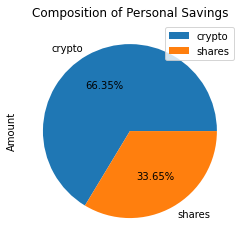

In [22]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings", autopct='%1.2f%%')

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund

36000

In [24]:
# Calculate total amount of savings
total_savings = total_crypto_assets + total_shares_value
print(f'The Total Amount of the Savings is ${total_savings:0,.2f}')

The Total Amount of the Savings is $129,840.22


In [25]:
# Validate saving health
if total_savings > emergency_fund:
    print(f'Congratulations! You have enough money in your emergency fund')
    
elif total_savings == emergency_fund:
    print(f'Congratulations! You reached your Financial Goal')

else:
        print(f'Unfortunately, you still need $({total_savings}-{emergency_fund}) to reach your goal')
    

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-06', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-06', tz='America/New_York').isoformat()

In [29]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_barset(tickers, timeframe, start= start_date, end=end_date, limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.85  118613594  
2017-05-18 00:00:00-04:00  235.70  237.75  235.43  236.67   82965499  
2017-05-19 00:00:00-04:00  237.33  239.08  237.27  238.30   69366163  
2017-05-22 00:00:00-04:00  238.90  239.71  238.82  239.53   37630972  
2017-05-23 00:00:00-04:00  239.95  240.24  239.51  240.02   36771135

In [32]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years_cm = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30)

In [33]:
# Printing the simulation input data
MC_30years_cm.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN  238.10  238.64  235.75  235.85   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                   
                              volume daily_return  
time                                               
2017-05-17 00:00:00-04:00  118613594          NaN  
2017-05-18 00:00:00-04:00   82965499     0.003477  
2017-05-19 00:00:00-04:00   69366163     0.006887  
2017-05-22 00:00:00-04:00   37630972     0.005162  
2017-05-23 00:00:00-04:00   36771135     0.002046

In [34]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years_cm.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990117,0.997592,0.992943,1.006387,1.010107,0.997528,0.988118,0.990611,1.018751,1.002016,...,0.996176,1.009252,1.002962,1.010470,1.008774,0.989519,1.010349,1.011350,0.992360,1.002007
2,0.994653,0.996001,0.987484,1.008491,1.003350,0.995906,0.997834,0.982089,1.023385,0.994861,...,1.002997,1.007423,1.011196,1.013165,1.005177,0.996618,1.016618,1.015230,0.978653,1.010484
3,0.996508,1.011791,0.992569,1.002145,1.006706,1.010486,0.993896,0.982407,1.022737,0.975626,...,1.014639,1.001448,1.005719,0.994882,1.005128,1.004803,1.025989,1.027690,0.987844,1.012517
4,1.001295,1.012215,0.995709,1.002460,1.002175,0.993454,0.990385,0.994084,1.032332,0.981073,...,1.015046,1.003979,1.004110,1.001377,1.010008,1.017780,1.026712,1.028791,0.989360,1.015198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,30.588758,8.424849,47.432712,21.312547,30.664563,22.234754,8.478108,18.588181,5.033100,8.508818,...,18.112918,11.876448,18.587785,57.074411,31.323381,10.725860,42.033397,37.297446,9.393188,13.776283
7557,30.281743,8.358319,47.211688,21.460732,30.735181,22.338079,8.436769,18.584492,5.045185,8.471890,...,18.118960,12.022836,18.547002,57.253069,31.276875,10.733578,41.741364,37.264806,9.386773,13.749493
7558,30.349704,8.322913,47.441945,21.581764,30.862632,22.337115,8.470610,18.829335,5.094973,8.527820,...,18.185656,11.968395,18.562694,57.255329,31.289913,10.710029,41.636170,37.009751,9.573483,13.778912
7559,30.205574,8.338226,47.255504,21.586609,30.937319,22.275839,8.412641,18.879309,5.061166,8.600405,...,18.181892,12.155236,18.758356,57.059243,31.726385,10.636170,41.683144,36.741002,9.658282,13.882920


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

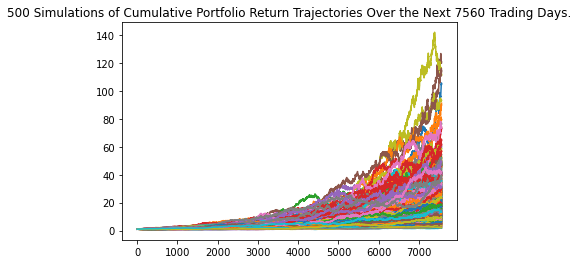

In [36]:
# Plot simulation outcomes
MC_sim_30years = MC_30years_cm.plot_simulation()
MC_sim_30years

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

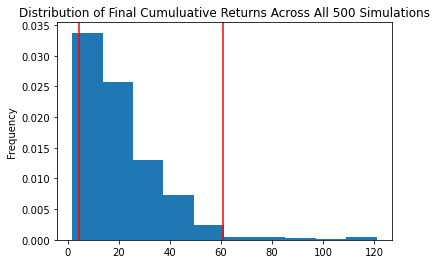

In [37]:
# Plot probability distribution and confidence intervals
MC_30years_dist_plot = MC_30years_cm.plot_distribution()
MC_30years_dist_plot

### Retirement Analysis

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_sum_sta = MC_30years_cm.summarize_cumulative_return()

# Print summary statistics
print(MC_sum_sta)

count           500.000000
mean             21.678853
std              16.749130
min               1.805770
25%              10.372541
50%              17.468950
75%              27.886496
max             120.956184
95% CI Lower      4.436780
95% CI Upper     60.841418
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_sum_sta[8]*initial_investment,2)
ci_upper = round(MC_sum_sta[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $88735.61 and $1216828.37


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_sum_sta[8]*initial_investment,2)
ci_upper = round(MC_sum_sta[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $133103.41 and $1825242.55


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years_cm = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*5)
MC_5years_cm.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN  238.10  238.64  235.75  235.85   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                   
                              volume daily_return  
time                                               
2017-05-17 00:00:00-04:00  118613594          NaN  
2017-05-18 00:00:00-04:00   82965499     0.003477  
2017-05-19 00:00:00-04:00   69366163     0.006887  
2017-05-22 00:00:00-04:00   37630972     0.005162  
2017-05-23 00:00:00-04:00   36771135     0.002046

In [43]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years_cm.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992636,1.006598,0.986813,1.019454,1.003936,0.993700,1.009416,0.984509,0.999970,0.984536,...,1.006529,0.990405,1.007682,0.983651,0.998292,0.997460,0.981545,0.996906,1.000903,0.999790
2,0.991187,1.010606,0.981041,1.026731,1.003291,0.991502,1.021003,0.987926,1.004129,1.008854,...,1.009198,0.978359,1.012192,0.987742,0.992290,1.009656,0.999485,0.996628,0.999066,0.985240
3,1.004344,1.037924,0.979147,1.047134,1.004672,0.979595,1.030885,0.988019,1.017967,1.005428,...,1.017940,0.963332,1.019450,0.985917,0.997837,0.992282,1.016183,1.000542,0.994062,0.984601
4,1.010214,1.047448,0.979036,1.056725,1.005247,0.968127,1.017377,0.986696,1.023352,0.994141,...,1.020243,0.968340,1.012794,0.978745,0.993671,0.998245,1.009594,0.998043,1.017477,0.982159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.452093,0.937341,2.691710,1.842730,1.136710,1.998100,1.340754,2.271156,1.632064,1.452867,...,1.812483,0.786865,2.333116,0.816235,3.012775,2.443337,1.146184,1.379353,2.046092,1.250334
1257,1.451683,0.927765,2.674032,1.848518,1.162605,1.987008,1.336578,2.253374,1.634366,1.451648,...,1.817210,0.796089,2.380967,0.816986,3.047424,2.427660,1.132990,1.383469,2.028135,1.249043
1258,1.443087,0.948925,2.684230,1.852163,1.156642,1.994237,1.338320,2.271726,1.629118,1.451388,...,1.809451,0.787680,2.345520,0.833352,3.034208,2.456853,1.136122,1.371575,2.047070,1.259312
1259,1.450931,0.949093,2.719702,1.883752,1.150373,2.009448,1.353905,2.241965,1.623577,1.462724,...,1.787644,0.777173,2.337662,0.845298,2.998122,2.470893,1.133401,1.386349,2.066066,1.249669


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

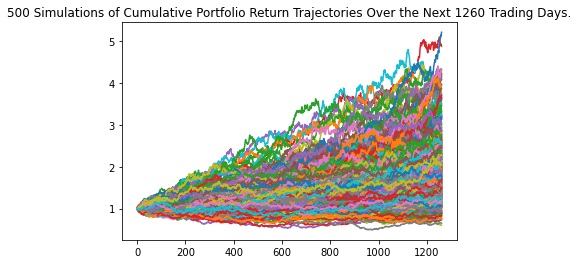

In [44]:
# Plot simulation outcomes
MC_sim_5years = MC_5years_cm.plot_simulation()
MC_sim_5years

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

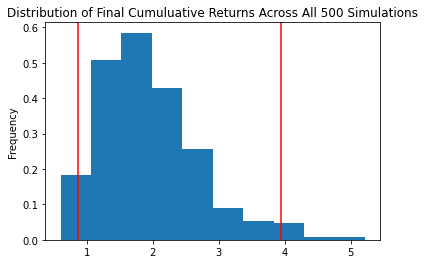

In [45]:
# Plot probability distribution and confidence intervals
MC_5years_dist_plot = MC_5years_cm.plot_distribution()
MC_5years_dist_plot

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_sum_sta_5 = MC_5years_cm.summarize_cumulative_return()

# Print summary statistics
print(MC_sum_sta_5)

count           500.000000
mean              1.945030
std               0.755650
min               0.599159
25%               1.400641
50%               1.818557
75%               2.335277
max               5.214802
95% CI Lower      0.861105
95% CI Upper      3.944110
Name: 1260, dtype: float64


In [63]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_sum_sta_5[8]*initial_investment,2)
ci_upper_five = round(MC_sum_sta_5[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $51666.33 and $236646.58


### Ten Years Retirement Option

In [64]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years_cm = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10)

MC_10years_cm.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-05-17 00:00:00-04:00  109.35  109.6000  109.2800  109.560  2263851   
2017-05-18 00:00:00-04:00  109.54  109.6299  109.4433  109.550  1873534   
2017-05-19 00:00:00-04:00  109.51  109.5350  109.3520  109.525  1345002   
2017-05-22 00:00:00-04:00  109.43  109.4800  109.4000  109.440  1199164   
2017-05-23 00:00:00-04:00  109.50  109.5300  109.2100  109.240  1194872   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2017-05-17 00:00:00-04:00          NaN  238.10  238.64  235.75  235.85   
2017-05-18 00:00:00-04:00    -0.000091  235.70  237.75  235.43  236.67   
2017-05-19 00:00:00-04:00    -0.000228  237.33  239.08  237.27  238.30   
2017-05-22 00:00:00-04:00    -0.000776  238.90  239.71  238.82  239.53   
2017-05-23 00:00:00-04:00    -0.001827  239.95  240.24  239.51  240.02   

                                                   
                              volume daily_return  
time                                               
2017-05-17 00:00:00-04:00  118613594          NaN  
2017-05-18 00:00:00-04:00   82965499     0.003477  
2017-05-19 00:00:00-04:00   69366163     0.006887  
2017-05-22 00:00:00-04:00   37630972     0.005162  
2017-05-23 00:00:00-04:00   36771135     0.002046

In [65]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years_cm.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012811,0.992818,1.024878,0.989560,0.986165,0.986436,0.985116,0.984794,0.988834,1.010529,...,0.993620,0.978253,0.990302,0.988490,0.986205,1.011038,0.965152,1.003763,0.990823,1.014367
2,1.014815,0.995433,1.036131,0.983227,0.981327,1.001589,0.981982,0.961284,0.976561,1.015662,...,0.973664,0.988631,0.998599,0.984090,1.001192,1.027763,0.951882,0.989008,0.977692,1.026172
3,1.007464,1.006109,1.029403,0.990155,0.996619,0.999395,0.979778,0.960685,0.992564,1.011377,...,0.973330,0.985917,1.009406,0.984193,0.999007,1.049059,0.967867,0.994735,0.967566,1.043532
4,1.006328,1.003862,1.038085,0.977775,1.011955,0.998807,0.987705,0.956967,0.984531,1.012512,...,0.979835,0.995075,1.018693,0.981989,0.979280,1.042195,0.994569,0.998043,0.970298,1.047339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.905173,2.966142,3.313327,2.810683,8.952317,2.374483,2.630585,1.375080,1.944333,7.856656,...,1.377347,4.185249,1.844623,2.075149,1.442622,3.402864,5.648442,3.885577,4.032605,2.129193
2517,2.932101,2.939475,3.386412,2.842298,8.960513,2.369750,2.673176,1.377349,1.937288,7.864628,...,1.370604,4.153442,1.867988,2.094775,1.477782,3.390456,5.627119,3.892191,4.057390,2.089865
2518,2.948465,2.895824,3.398340,2.825767,9.071896,2.340426,2.654505,1.387852,1.957816,7.950758,...,1.356222,4.168812,1.855235,2.060903,1.473083,3.450028,5.493938,3.777390,4.110988,2.085581
2519,2.965349,2.884898,3.417461,2.876558,8.995730,2.331079,2.632363,1.402065,1.918466,8.022934,...,1.344405,4.118696,1.843860,2.067680,1.457660,3.483852,5.418009,3.777231,4.104401,2.080027


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

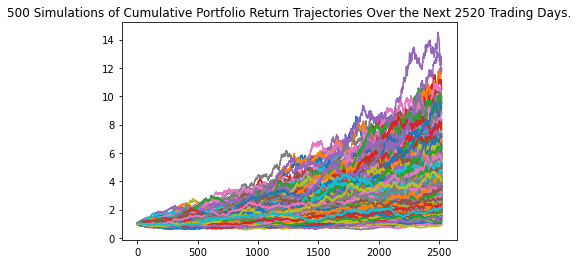

In [66]:
# Plot simulation outcomes
MC_sim_10years = MC_10years_cm.plot_simulation()
MC_sim_10years

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

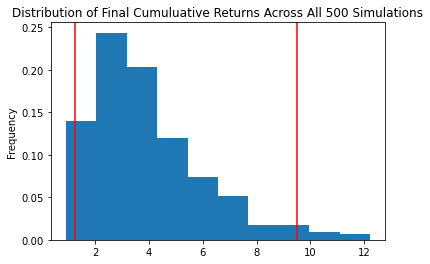

In [67]:
# Plot probability distribution and confidence intervals
MC_10years_dist_plot = MC_10years_cm.plot_distribution()
MC_10years_dist_plot

In [68]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_sum_sta_10 = MC_10years_cm.summarize_cumulative_return()

# Print summary statistics
print(MC_sum_sta_10)

count           500.000000
mean              3.939410
std               2.113061
min               0.895779
25%               2.374200
50%               3.484084
75%               4.993050
max              12.230585
95% CI Lower      1.256563
95% CI Upper      9.488161
Name: 2520, dtype: float64


In [69]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_sum_sta_10[8]*initial_investment,2)
ci_upper_ten = round(MC_sum_sta_10[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $75393.76 and $569289.67


In [80]:
print(f'Retirement Analysis Review:')

print(f'After comparing all retirement plans, I would sugess to go with 30 years with an initial investment of $30000, because it will have a return between $133103.41 and $1825242.55.')
print(f'Even 30 years with an initial investment of $20000, still a good option. 5 years plan is definitely not a good option as the CI lower return will end up in lost of $-8334 front initial invesment of $60000 and high ratio in stock and to conclude, 10 years plan does not seems to be very promising for a retirement plan.')

Retirement Analysis Review:
After comparing all retirement plans, I would sugess to go with 30 years with an initial investment of $30000, because it will have a return between $133103.41 and $1825242.55.
Even 30 years with an initial investment of $20000, still a good option. 5 years plan is definitely not a good option as the CI lower return will end up in lost of $-8334 front initial invesment of $60000 and high ratio in stock and to conclude, 10 years plan does not seems to be very promising for a retirement plan.
